### `Exercise`
# Word clouds
Word clouds are quite often over used, but for a good reason. They are a simple and intuitive way to visualizing text data. 

A common convention is to map the size of the words in the word cloud to represent the frequency in which a word appears. In the context of sentiment analysis, you can encode the sentiment using a divergent color (e.g. green for positive and red for negative). 

Not only do you get to see which words are the most prominent in a corpus of text, but you get an idea of the sentiment. 
In this exercise, we will create a word cloud using the wordcloud package. 

The `songs_sentiment` dataframe is loaded into your workspace.

### `Instructions`

* Load the `ggwordcloud` package.
* Create a wordcloud using the `word`, `n` for the label and the size.
* Assign `sentiment` to the color of the word cloud.
* Color the negative values `red` and the positive values `green`

### `Workspace`

The workspace should contain a dataframe called songs_sentiment. <br>
Students created this dataframe in chapter 3 of the course and the whole thing should be familiar by now.<br>
We might want to consider using a different dataset or filtering out the profanity thought. 

In [53]:
# Preloaded packages
library(tidyverse)
library(tidytext)

# This is how the dataset, that the students built in 3rd chapter, should look like.
songs_sentiment <- read_csv('datasets/songs_sentiment.csv')

# This is a file I made a long time ago for a pet project. 
glimpse(songs_sentiment)

Parsed with column specification:
cols(
  rank = col_double(),
  song = col_character(),
  artist = col_character(),
  year = col_double(),
  song_id = col_double(),
  word = col_character(),
  sentiment_afinn = col_double(),
  sentiment_bing = col_character(),
  sentiment_nrc = col_character()
)


Observations: 53,531
Variables: 9
$ rank            <dbl> 49, 49, 49, 49, 42, 42, 42, 42, 87, 99, 11, 40, 44,...
$ song            <chr> "come back to me", "come back to me", "come back to...
$ artist          <chr> "janet jackson", "janet jackson", "janet jackson", ...
$ year            <dbl> 1990, 1990, 1990, 1990, 1992, 1992, 1992, 1992, 199...
$ song_id         <dbl> 2370, 2370, 2370, 2370, 2554, 2554, 2554, 2554, 250...
$ word            <chr> "abandoned", "abandoned", "abandoned", "abandoned",...
$ sentiment_afinn <dbl> -2, -2, -2, -2, -2, -2, -2, -2, 2, 1, 1, 1, 1, 1, -...
$ sentiment_bing  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,...
$ sentiment_nrc   <chr> "anger", "fear", "negative", "sadness", "anger", "f...


### `Coding Exercise`

This is the exercise the students have to do.

In [ ]:
# Load the ggwordcloud package
library(...)

# Here we specify how we want to encode the sentiment afinn color to a color palette
wordcloud <- songs_sentiment %>%
    # Group by word
    group_by(word) %>%
    # Count the number of words and average for the sentiment column
    summarize(n = n(), sentiment = mean(sentiment_afinn)) %>%
    # Only words that appeared more than 100 times
    filter(n > 100 ) 

wordcloud %>%
    # Create a wordcloud
    ggplot(aes(label = ... , size = ... , color = ... )) +
    geom_text_wordcloud_area() +
    scale_size_area(max_size = 50) +
    theme_minimal() +
    # Negative sentiment values will be shown "red" and the positives "green"
    scale_color_gradient(low = ... , high = ...)

### `Answer`

This is how the final code will look like

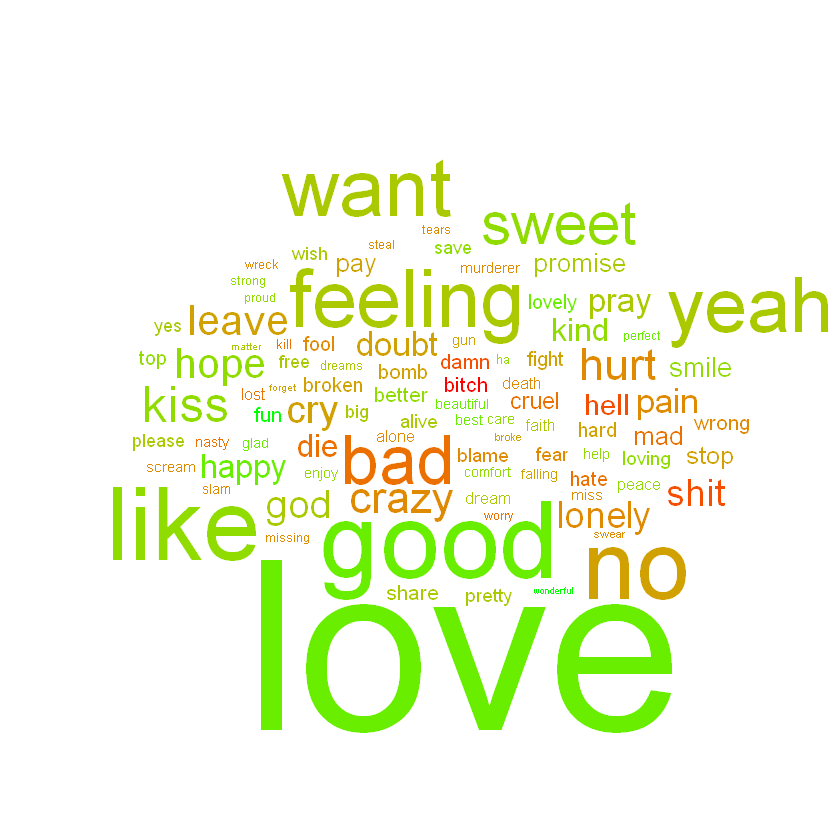

In [57]:
# Load the ggwordcloud package
library(ggwordcloud)

wordcloud <- songs_sentiment %>%
    group_by(word) %>%
    summarize(n = n(), sentiment = mean(sentiment_afinn)) %>%
    filter(n > 100 ) 

wordcloud %>%
    # Create a wordcloud
    ggplot(aes(label = word, size = n, color = sentiment)) +
    geom_text_wordcloud_area() +
    scale_size_area(max_size = 50) +
    theme_minimal() +
    # Negative sentiment values will be shown red and the positives green
    scale_color_gradient(low = "red", high = "green")